Решим задачу классификации типа стекол.  Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline

In [6]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
# проверим на пропуски - пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [16]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:>

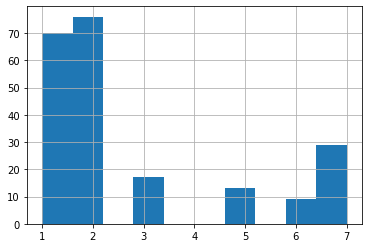

In [13]:
df['Type'].hist()

In [179]:
X = df.drop(columns = ['Type'])
y = df['Type']

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                                    test_size = 0.2, random_state = 10)

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [261]:
dt = RandomForestClassifier(n_estimators=100,  max_depth=5, random_state=10)
dt.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [262]:
# метрики модели на обучающей тестовой выборке
dt.score(X_test, y_test)

0.627906976744186

In [263]:
# метрики модели на обучающей выборке
dt.score(X_train, y_train)

0.935672514619883

In [62]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


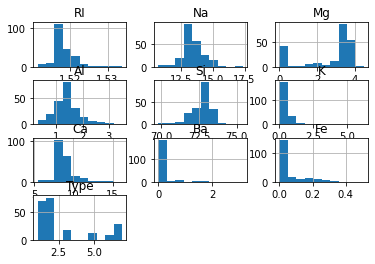

In [80]:
# распредлеление, близкое к нормальному, у элементов Na, Ca, Ba
df.hist()
plt.show()

## Работа с выбросами

посмотрим на выбросы по элементам

<AxesSubplot:>

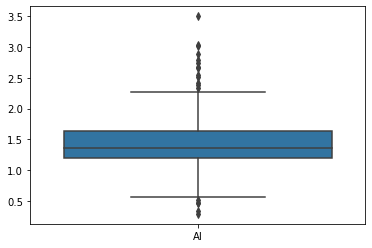

In [85]:
sns.boxplot(data=df[['Al']])

<AxesSubplot:>

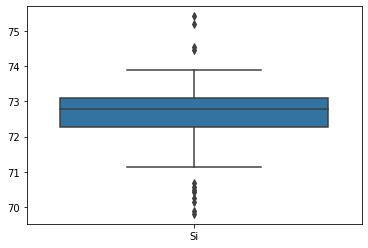

In [87]:
sns.boxplot(data=df[['Si']])

<AxesSubplot:>

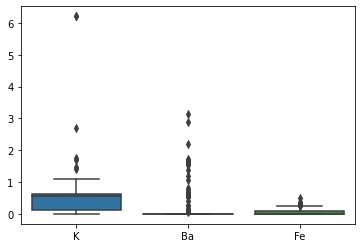

In [90]:
sns.boxplot(data=df[['K', 'Ba', 'Fe']])

<AxesSubplot:>

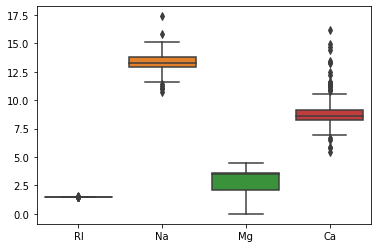

In [89]:
sns.boxplot(data=df[['RI', 'Na','Mg', 'Ca']])

In [173]:
# удалим выбросы
Q1 = X.quantile(q=.25)
Q3 = X.quantile(q=.75)
IQR = Q3-Q1


X_clean = X[~((X < (Q1-1.5*IQR)) | (X > (Q3+1.5*IQR))).any(axis=1)]

X_clean

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0


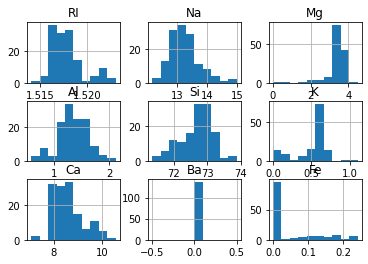

In [191]:
# сравним гистограммы очищенных значений с исходными.
# Гистограммы сталее более похожими на нормальное распределение, жирные хвосты ушли
X_clean.hist()
plt.show()

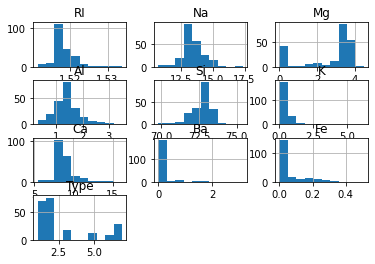

In [192]:
df.hist()
plt.show()

In [174]:
y_clean = df['Type'].iloc[X_clean.index]

In [243]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean,y_clean, 
                                                    test_size = 0.2, random_state = 10)

In [248]:
dt2 = RandomForestClassifier(n_estimators=100,  max_depth=5, random_state=11)
dt2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=5, random_state=11)

In [249]:
# метрики модели на обучающей тестовой выборке
dt2.score(X_test2, y_test2)

0.7857142857142857

In [250]:
# метрики модели на обучающей выборке
dt2.score(X_train2, y_train2)

0.9629629629629629

In [265]:
# выведем  результаты всех моделей в одну таблицу

pd.DataFrame({'Model': ['RandomForest', 'RandomForest_cleared'], 'test_score': [dt.score(X_test, y_test),
 dt2.score(X_test2, y_test2)],
'train_score': [dt.score(X_train, y_train), dt2.score(X_train2, y_train2)]})

,Model,test_score,train_score
0,RandomForest,0.627907,0.935673
1,RandomForest_cleared,0.785714,0.962963


После удаления выбросов метрики улучшились